## Titanic Data Science Solutions


I have released a new Python package Speedml which codifies the techniques used in this notebook into an intuitive, powerful, and productive API.
Speedml helps me jump from low 80% on the Kaggle leaderboard to high 20% within few iterations.
One more thing... Speedml achieves this with nearly 70% fewer lines of code!
<br>

This notebook is a companion to the book Data Science Solutions. The notebook walks us through a typical workflow for solving data science competitions at sites like Kaggle.
There are several excellent notebooks to study data science competition entries. However many will skip some of the explanation on how the solution is developed as these notebooks are developed by experts for experts. The objective of this notebook is to follow a step-by-step workflow, explaining each step and rationale for every decision we take during solution development.

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

<ol>
<li>Question or problem definition.</li>
<li>Acquire training and testing data.</li>
<li>Wrangle, prepare, cleanse the data.</li>
<li>Analyze, identify patterns, and explore the data.</li>
<li>Model, predict and solve the problem.</li>
<li>Visualize, report, and present the problem solving steps and final solution.</li>
<li>Supply or submit the results.</li>
</ol>
The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.
We may combine mulitple workflow stages. We may analyze by visualizing data.
<ul>
<li>Perform a stage earlier than indicated. We may analyze data before and after wrangling.</li>
<li>Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.</li>
<li>Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.</li>
</ul>

In [1]:

import numpy as np                                      # data analysis and wrangling
import pandas as pd
import random as rnd

import seaborn as sns                                   # visualization
import matplotlib.pyplot as plt
%matplotlib inline

                                        
from sklearn.linear_model import LogisticRegression     # machine learning
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


## Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together

In [49]:
import os
os.chdir('D:\\user_profile\\python\\kaggle\\Titanic data analyze')

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

## Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.
##### Which features are available in the dataset?

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


##### Which features are categorical?
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
##### Which features are numerical?
Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
Continous: Age, Fare. Discrete: SibSp, Parch.

In [50]:
train_df.head()             # preview the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Which features are mixed data types?
Numerical, alphanumeric data within same feature. These are candidates for correcting goal.
<ul><li>
Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
</li></ul>

##### Which features may contain errors or typos?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
<ul><li>
Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
</li></ul>

In [51]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##### Which features contain blank, null or empty values?
These will require correcting.
<ul><li>
Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.
</li></ul>

##### What are the data types for various features?
Helping us during converting goal.
<ul><li>
Seven features are integer or floats. Six in case of test dataset.
Five features are strings (object).
</li></ul>

In [52]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

##### What is the distribution of numerical feature values across the samples?
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
<ul>
<li>Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).</li>
<li>Survived is a categorical feature with 0 or 1 values.</li>
<li>Around 38% samples survived representative of the actual survival rate at 32%.</li>
<li>Most passengers (> 75%) did not travel with parents or children.</li>
<li>Nearly 30% of the passengers had siblings and/or spouse aboard.</li>
<li>Fares varied significantly with few passengers (<1%) paying as high as $512.</li>
<li>Few elderly passengers (<1%) within age range 65-80.</li>
</ul>

In [53]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### What is the distribution of categorical features?
<ul>
<li>Names are unique across the dataset (count=unique=891)</li>
<li>Sex variable as two possible values with 65% male (top=male, freq=577/count=891).</li>
<li>Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.</li>
<li>Embarked takes three possible values. S port used by most passengers (top=S)</li>
<li>Ticket feature has high ratio (22%) of duplicate values (unique=681).</li>
</ul>

In [54]:
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mockler, Miss. Helen Mary ""Ellie""",male,347082,G6,S
freq,1,577,7,4,644


## Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.
<ul>
<li>Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.</li>
<li>Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).</li>
<li>SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).</li>
</ul>

In [55]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [56]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [57]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [58]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.
##### Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).
A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)
Note that x-axis in historgram visualizations represents the count of samples or passengers.
##### Observations.
<ul>
<li>Infants (Age <= 4) had high survival rate.</li>
<li>Oldest passengers (Age = 80) survived.</li>
<li>Large number of 15-25 year olds did not survive.</li>
<li>Most passengers are in 15-35 age range.</li>
</ul>

##### Decisions.
This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
<ul>
<li>We should consider Age (our assumption classifying #2) in our model training.</li>
<li>Complete the Age feature for null values (completing #1).</li>
<li>We should band age groups (creating #3).</li>
</ul>

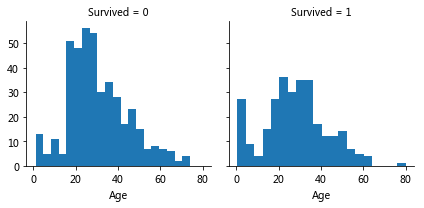

In [59]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

##### Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.
##### Observations.
<ul>
<li>Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.</li>
<li>Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.</li>
<li>Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.</li>
<li>Pclass varies in terms of Age distribution of passengers.</li>
</ul>

#####  Decisions.
<ul>
<li>Consider Pclass for model training.</li>
</ul>    

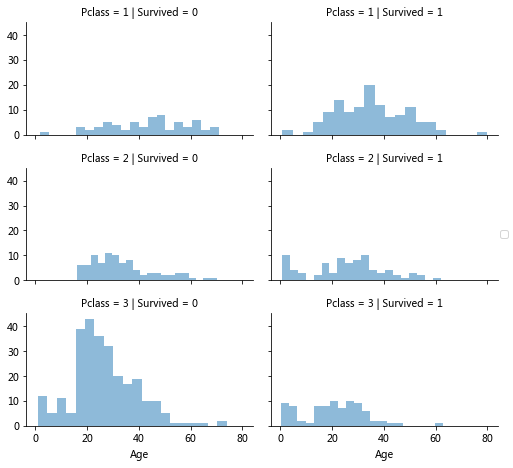

In [60]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

##### Correlating categorical features
Now we can correlate categorical features with our solution goal.
##### Observations.
<ul>
<li>Female passengers had much better survival rate than males. Confirms classifying (#1).</li>
<li>Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.</li>
<li>Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).</li>
<li>Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).</li>
</ul>

##### Decisions.
<ul>
<li>Add Sex feature to model training.</li>
<li>Complete and add Embarked feature to model training.</li>
</ul>

D:\Software\anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Software\anaconda\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


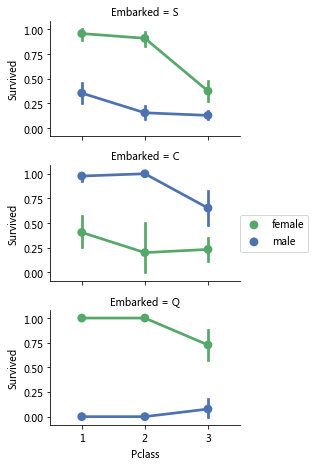

In [61]:
grid = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

##### Correlating categorical and numerical features
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).
##### Observations.
<ul>
<li>Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.</li>
<li>Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).</li>
</ul>

##### Decisions.
<ul>
<li>Consider banding Fare feature.</li>
</ul>

D:\Software\anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


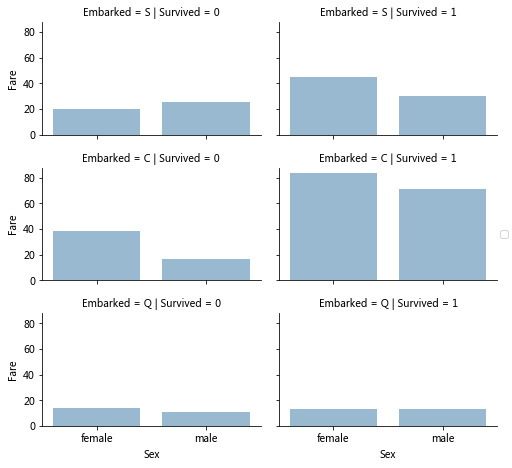

In [62]:
grid = sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

## Wrangle data
We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.
##### Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.
Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.
Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [63]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
test_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
combine = [train_df,test_df]

print('After',train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


##### Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.
In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.
##### Observations.
When we plot Title, Age, and Survived, we note the following observations.
<ul>
<li>Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.</li>
<li>Survival among Title Age bands varies slightly.</li>
<li>Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).</li>
</ul>

##### Decision.
<ul><li>We decide to retain the new Title feature for model training.</li></ul>

In [64]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [65]:

# We can replace many titles with a more common name or classify them as Rare.
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()



,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [66]:
# We can convert the categorical titles to ordinal.
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [67]:

# Now we can safely drop the Name feature from training and testing datasets. 
# We also do not need the PassengerId feature in the training dataset.

train_df.drop(['Name','PassengerId'],axis=1,inplace=True)
test_df.drop(['Name'],axis=1,inplace=True)
combine = [train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

##### Converting a categorical feature
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.
Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [68]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


##### Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.
We can consider three methods to complete a numerical continuous feature.
<ol>
<li>A simple way is to generate random numbers between mean and standard deviation.</li>
<li>More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...</li>
<li>Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.</li>
</ol>    
Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

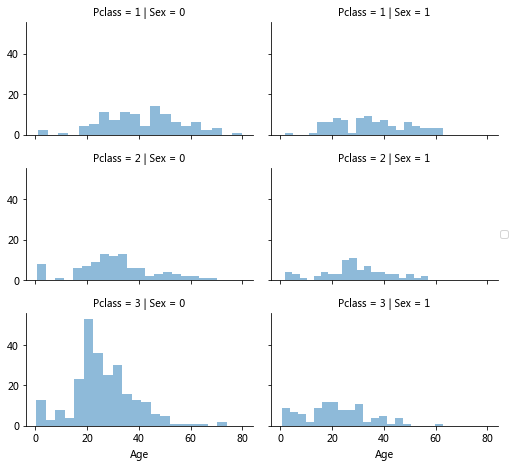

In [69]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [70]:
# Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.
guess_ages = np.zeros((2,3))
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                              (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5+0.5)*0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()                       

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [71]:
# Let us create Age bands and determine correlations with Survived.
train_df['Age_brand'] = pd.cut(train_df['Age'],5)
train_df[['Age_brand','Survived']].groupby(['Age_brand'],as_index=False).mean().sort_values(by='Age_brand',ascending=False)

,Age_brand,Survived
4,"(64.0, 80.0]",0.090909
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
0,"(-0.08, 16.0]",0.550000


In [72]:
# Let us replace Age with ordinals based on these bands.
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64),'Age'] = 3
    dataset.loc[(dataset['Age'] > 64),'Age' ] = 4
    
train_df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_brand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [73]:
# We can remove the AgeBand feature.

train_df.drop(['Age_brand'],axis=1,inplace=True)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


##### Create new feature combining existing features


In [74]:
# We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.
for dataset in combine:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] +1
    
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [75]:
# We can create another feature called IsAlone.
for dataset in combine:
    dataset['isAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1,'isAlone'] =1

train_df[['isAlone','Survived']].groupby(['isAlone'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [76]:
# Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

train_df.drop(['Parch','SibSp','FamilySize'],axis=1,inplace=True)
test_df.drop(['Parch','SibSp','FamilySize'],axis=1,inplace=True)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [77]:
# We can also create an artificial feature combining Pclass and Age.
for dataset in combine:
    dataset['Age*Pclass'] = dataset['Age'] * dataset['Pclass']

train_df.loc[:,['Age*Pclass','Age','Pclass']].head(10)


,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


##### Completing a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [79]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'].fillna(freq_port,inplace=True)

train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)    

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


##### Converting categorical feature to numeric


In [80]:
# We can now convert the EmbarkedFill feature by creating a new numeric Port feature.
for dataset in combine:
    dataset['Embarked']= dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


##### Quick completing and converting a numeric feature
<p>We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.</p>
<p>Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.</p>
<p>We may also want round off the fare to two decimals as it represents currency.</p>

In [81]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [84]:
# We can  create FareBand.
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)

train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=False)    

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [85]:
# Convert the Fare feature to ordinal values based on the FareBand.
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare']=1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31),'Fare']=2
    dataset.loc[dataset['Fare'] > 31,'Fare'] = 3
    dataset['Fare']=dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'],axis=1)
combine = [train_df,test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [86]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, predict and solve
<p>Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:</p>
<ul>
<li>Logistic Regression</li>
<li>KNN or k-Nearest Neighbors</li>
<li>Support Vector Machines</li>
<li>Naive Bayes classifier</li>
<li>Decision Tree</li>
<li>Random Forrest</li>
<li>Perceptron</li>
<li>Artificial neural network</li>
<li>RVM or Relevance Vector Machine</li>
</ul>    

In [88]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']

X_test = test_df.drop('PassengerId',axis=1).copy()

X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

<p>Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.
Note the confidence score generated by the model based on our training dataset.</p>


In [102]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

81.26

<p>We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.</p>
<p>Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).</p>
<ul>
<li>Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.</li>
<li>Inversely as Pclass increases, probability of Survived=1 decreases the most.</li>
<li>This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.</li>
<li>So is Title as second highest positive correlation.</li>
</ul>    

In [103]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)


,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,isAlone,0.262084
3,Fare,-0.022062
7,Age*Pclass,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


<p>Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference <a>Wikipedia</a>.</p>
<p>Note that the model generates a confidence score which is higher than Logistics Regression model.</p>

In [104]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

83.5

<p>In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.</p>
<p>KNN confidence score is better than Logistics Regression but worse than SVM.</p>

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

84.06

<p>
In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.</p>
<p>The model generated confidence score is the lowest among the models evaluated so far.</p>

In [106]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

76.88

<p>The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference <a href='www.wikipedia.com'>Wikipedia</a>.</p>

In [107]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

D:\Software\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.79

In [108]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train)*100,2)
acc_linear_svc

79.46

In [109]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

D:\Software\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


73.85

<p>This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference <a href='www.wikipedia.org'>Wikipedia</a>.</p>
<p>The model confidence score is the highest among models evaluated so far.</p>

In [110]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

86.64

<p>The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference <a href=''>Wikipedia</a>.</p>
<p>The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.</p>

In [111]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

86.64

##### Model evaluation
<p>We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.</p>

In [112]:
models = pd.DataFrame({
    'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score':[acc_svc,acc_knn,acc_log,acc_random_forest,acc_gaussian,acc_perceptron,acc_sgd,acc_linear_svc,acc_decision_tree]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,78.79
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,73.85


In [113]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred
})

print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         1
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         1
390         1282         0
391         1283         1
392         1284         1
3